# Example simulations with different gains, fully random networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ntwk import SoftmaxNtwk
from disp import set_plot, set_color

In [2]:
DS = [50, 30, 20, 15, 10, 5]
N = 1000
g = np.inf

In [4]:
raise Exception  # comment out to run
rslts = []

for D in DS:
    print(f'D = {D}')
    J = np.nan*np.zeros((D, D, N, N))

    for d_to in range(D):
        for d_from in range(D):
            J[d_to, d_from, :, :] = np.random.randn(N, N)*np.sqrt(D/N)
            
    ntwk = SoftmaxNtwk(J)
    
    x_0 = np.random.randn(N, D)
    t, xs, ys = ntwk.run(g=g, t_max=1000, x_0=x_0, progress=50)
    print('')
    
    rslts.append((t, xs, ys))
    
np.save('data/sparse_spiking/mean_sd_rates_vs_d.npy', np.array([{'DS': DS, 'rslts': rslts, 'N': N}]))

Exception: 

In [5]:
data = np.load('data/sparse_spiking/mean_sd_rates_vs_d.npy', allow_pickle=True)[0]
DS = data['DS']
rslts = data['rslts']

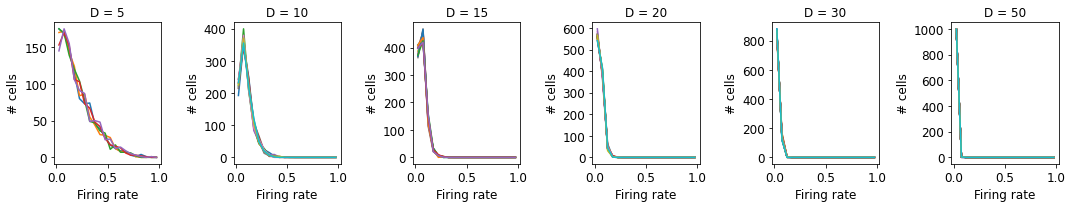

In [6]:
bins_fr = np.linspace(0, 1, 21)
binc_fr = .5*(bins_fr[:-1] + bins_fr[1:])
fig, axs = plt.subplots(1, len(DS), figsize=(15, 3), tight_layout=True)
for ax, D, (t, xs, ys) in zip(axs[::-1], DS, rslts):
    for d in range(D):
        frs = ys[:, :, d].mean(0)
        
        cts, bins = np.histogram(frs, bins_fr)
        ax.plot(binc_fr, cts)
        
    set_plot(ax, x_label='Firing rate', y_label='# cells', title=f'D = {D}')

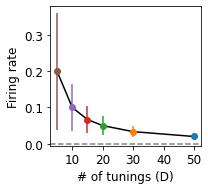

In [14]:
# plot medata/ and std of spike rates vs D
fig, ax = plt.subplots(1, 1, figsize=(3, 2.75), tight_layout=True)
for D, (t, xs, ys) in zip(DS, rslts):
    
    frs_all = ys.mean(0)
    fr_mn = frs_all.mean()  # average over time and tunings
    fr_sd = frs_all.std()
    
    ax.errorbar([D], [fr_mn], yerr=[fr_sd], fmt='o')
    
ax.plot(DS, 1/np.array(DS), c='k')

ax.axhline(0, ls='--', color='gray')

set_plot(ax, x_label='# of tunings (D)', y_label='Firing rate')

fig.savefig('figs/main/2_sparse_spiking.svg')